2018-10-18 14:45:20,547 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[100/100] grid cells ████████████████████ Time elapsed: 1 seconds

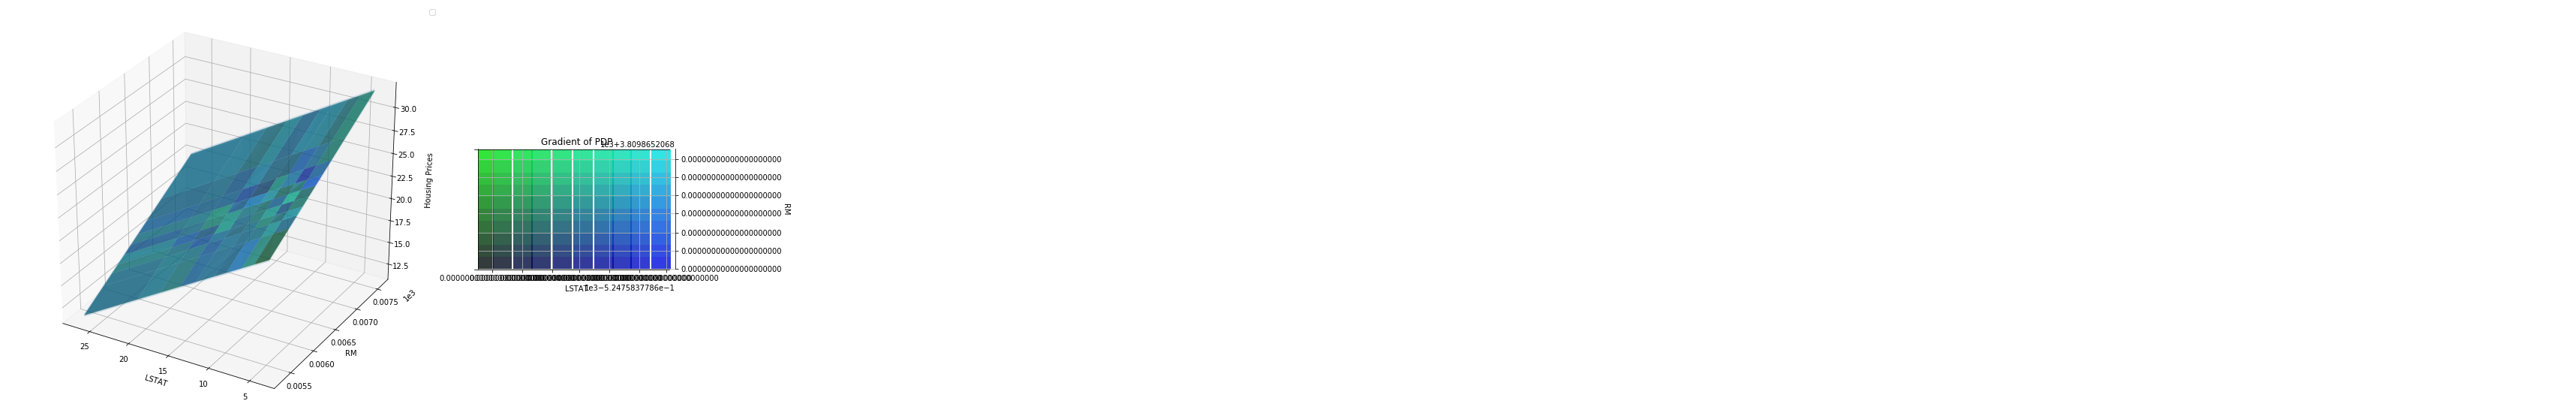

In [1]:
%matplotlib inline
#load some data
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_boston

boston = load_boston()
X_boston = boston.data
features_boston = boston.feature_names
y_boston = boston.target

from skater.model import DeployedModel
from skater.core.explanations import Interpretation
from skater.model import InMemoryModel

def input_formatter(data):
    return {'input':data.tolist()}
    
def output_formatter(response, key='predictions'):
    print
    return np.array(response.json()[key])

uri = 'http://localhost:5000/predict'

dep_model = DeployedModel(uri, 
                         input_formatter,
                         output_formatter,
                         target_names=['Housing Prices'], 
                         examples=X_boston[:1000])


interpreter_boston = Interpretation(X_boston[:1000])
interpreter_boston.load_data(X_boston[:1000], feature_names=features_boston)
pdp = interpreter_boston.partial_dependence.plot_partial_dependence([('LSTAT','RM')],
                                                                    dep_model,
                                                                    with_variance=True, 
                                                                    sampling_strategy='random-choice',
                                                                    n_jobs=4,
                                                                    grid_resolution=10,
                                                                    n_samples = 500,
                                                                    sample=True)

2018-10-18 14:45:23,499 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[10/10] grid cells ████████████████████ Time elapsed: 0 seconds

2018-10-18 14:45:23,838 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[10/10] grid cells ████████████████████ Time elapsed: 0 seconds

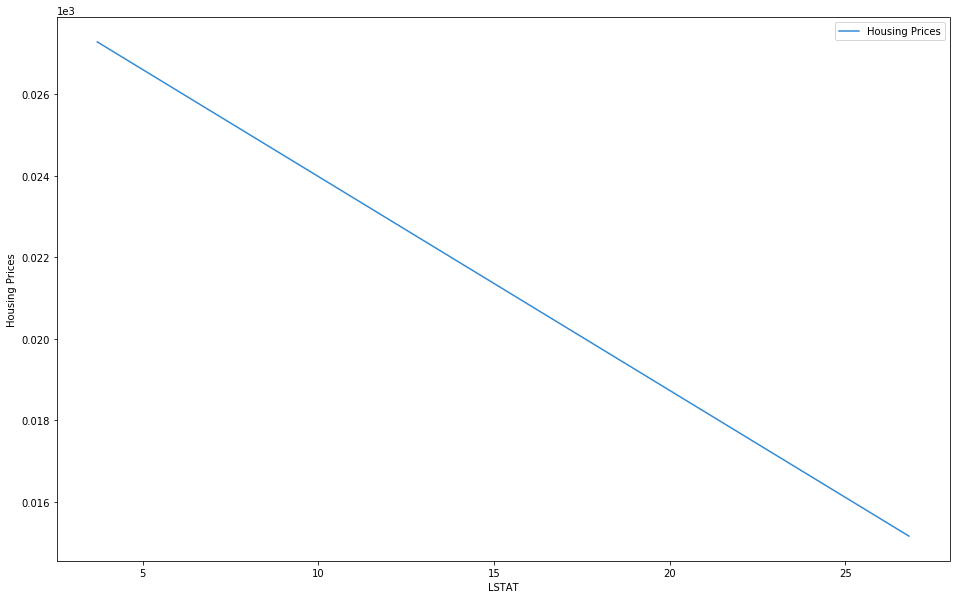

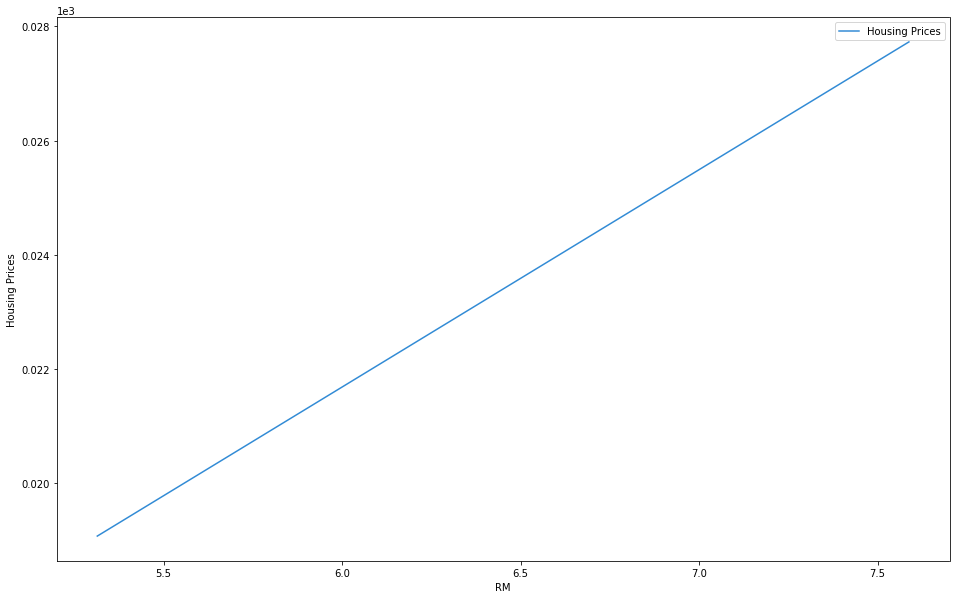

In [2]:
%matplotlib inline
pdp = interpreter_boston.partial_dependence.plot_partial_dependence(['LSTAT','RM'],
                                                                    dep_model,
                                                                    sampling_strategy='random-choice',
                                                                    n_jobs=4,
                                                                    grid_resolution=10,
                                                                    n_samples = 500,
                                                                    sample=True)

In [3]:
from skater.core.local_interpretation.lime.lime_tabular import LimeTabularExplainer
exp = LimeTabularExplainer(X_boston, mode='regression')
exp.explain_instance(X_boston[0], dep_model).show_in_notebook()